In [ ]:
import numpy
import pandas as pd
from google.colab import files
data_to_load = files.upload()
import io
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 

Saving train.csv to train.csv


In [ ]:
dtf = pd.read_csv(io.BytesIO(data_to_load['train.csv']))
dtf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
model = LogisticRegression()
dtf['male'] = dtf['Sex'] == 'male'
moy = sum(dtf['Fare'])/len(dtf['Fare'])
moy2 = sum(dtf['Age'])/len(dtf['Age'])
dtf['Fare'] = dtf['Fare'].fillna(moy)
dtf['Age'] = dtf['Age'].fillna(moy2)
dfx = dtf[['Age','Pclass','male','Fare','SibSp','Parch']]
dfx

,Age,Pclass,male,Fare,SibSp,Parch
0,22.000000,3,True,7.2500,1,0
1,38.000000,1,False,71.2833,1,0
2,26.000000,3,False,7.9250,0,0
3,35.000000,1,False,53.1000,1,0
4,35.000000,3,True,8.0500,0,0
...,...,...,...,...,...,...
886,27.000000,2,True,13.0000,0,0
887,19.000000,1,False,30.0000,0,0
888,32.204208,3,False,23.4500,1,2
889,26.000000,1,True,30.0000,0,0


In [ ]:
X = dfx.values
y = dtf['Survived'].values
model.fit(X,y)
print(model.coef_)
print(model.score(X,y))
print(model.predict(X[:5]))
print(model.predict([[29,1,True,7,0,2]]))

[[-0.03879617 -1.04128625 -2.65453284  0.00303133 -0.34023998 -0.10814267]]
0.8024691358024691
[0 1 1 1 0]
[0]


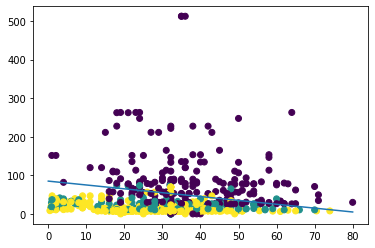

In [ ]:
plt.scatter(dtf['Age'], dtf['Fare'], c=dtf['Pclass'])
plt.plot([0, 80], [85, 5])